In [55]:
import pandas as pd

# Load the data
data = pd.read_csv('Company%28FRA%29.csv')

# Display the first few rows of the dataset
data.head()


,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [56]:
# Shape of the dataset
print(f"Shape of the dataset: {data.shape}")

# Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Data types of each column
print("\nData types of each column:")
print(data.dtypes)

# Statistical summary
print("\nStatistical summary of the dataset:")
print(data.describe())


Shape of the dataset: (4256, 51)

Missing Values:
Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income  

In [57]:
# Remove rows with missing values
data = data.dropna()

# Check the shape of the data before and after removing missing values
print("Data shape after removing missing values:", data.shape)


Data shape after removing missing values: (655, 51)


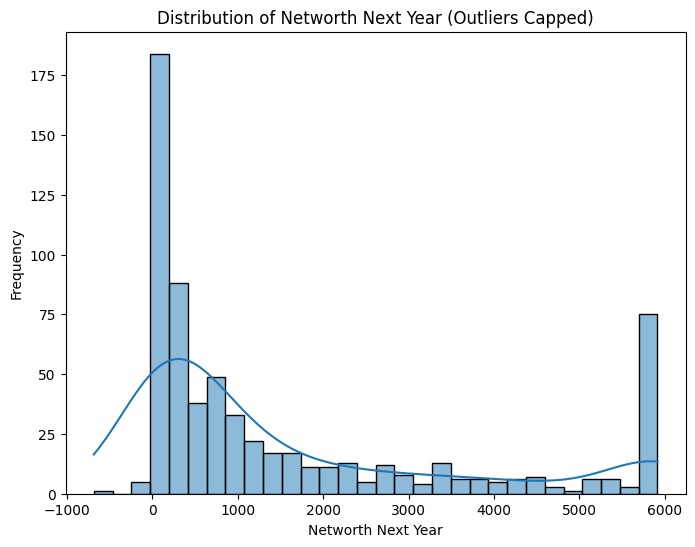

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
# Cap outliers
capped_data = data.copy()
capped_data['Networth Next Year'] = capped_data['Networth Next Year'].clip(lower=lower_bound, upper=upper_bound)

# Plot the histogram again after capping outliers
plt.figure(figsize=(8, 6))
sns.histplot(capped_data['Networth Next Year'], bins=30, kde=True)
plt.title('Distribution of Networth Next Year (Outliers Capped)')
plt.xlabel('Networth Next Year')
plt.ylabel('Frequency')
plt.show()


In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Outlier Detection and Treatment
def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

key_metrics = ['Total assets', 'Net worth', 'Total income', 'Total expenses', 'Profit after tax']

for metric in key_metrics:
    cap_outliers(data, metric)


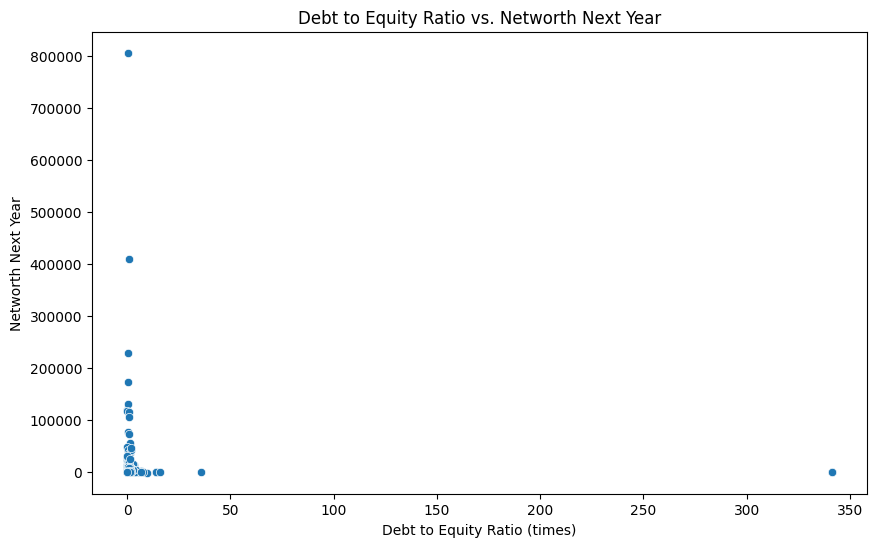

In [60]:
debt_ratio_column = 'Debt to equity ratio (times)'
networth_next_year_column = 'Networth Next Year'

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x=debt_ratio_column, y=networth_next_year_column)
plt.title('Debt to Equity Ratio vs. Networth Next Year')
plt.xlabel('Debt to Equity Ratio (times)')
plt.ylabel('Networth Next Year')
plt.show()

       Total assets    Net worth  Total income  Total expenses  \
count    655.000000   655.000000    655.000000      655.000000   
mean    4735.164656  1793.143817   5377.759084     5027.837023   
std     5160.464862  2047.321934   5972.250771     5505.647037   
min       70.400000     7.100000     44.600000       51.200000   
25%      828.500000   283.400000   1033.850000      987.550000   
50%     2261.500000   848.000000   2528.500000     2376.200000   
75%     6669.400000  2638.000000   7918.100000     7326.950000   
max    15430.750000  6169.900000  18244.475000    16836.050000   

       Profit after tax  
count        655.000000  
mean         301.238092  
std          389.601028  
min         -549.600000  
25%           27.150000  
50%          115.200000  
75%          464.000000  
max         1119.275000  


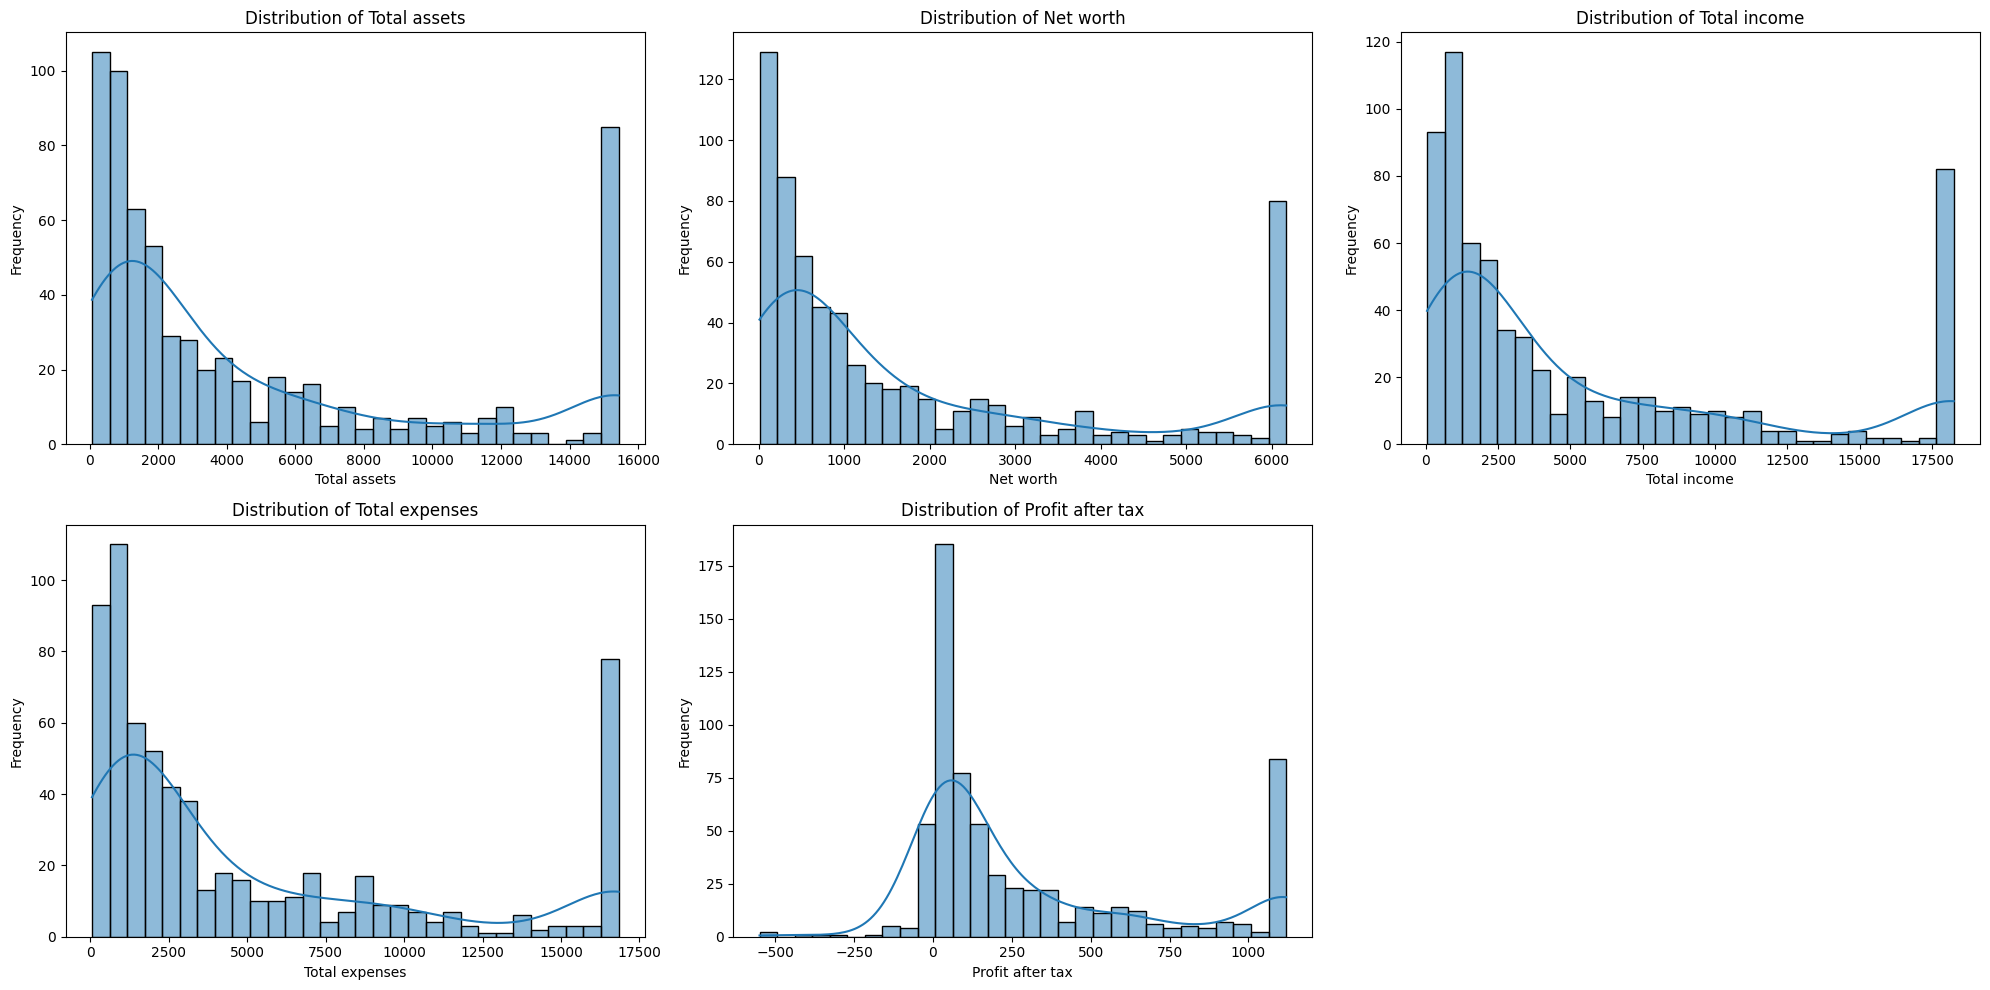

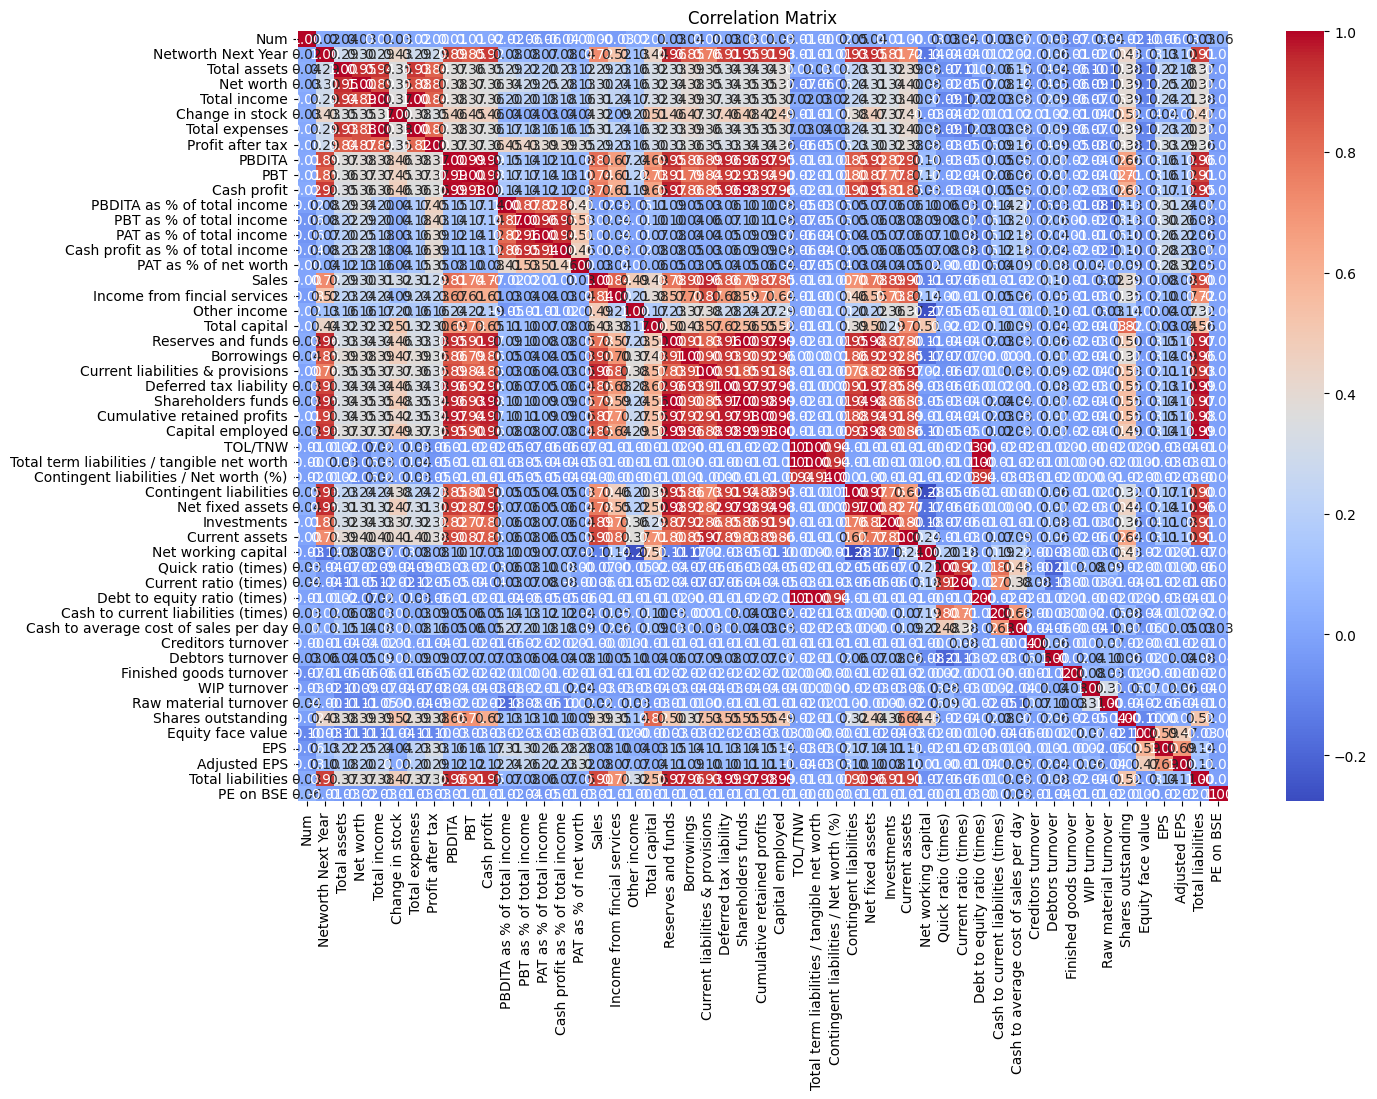

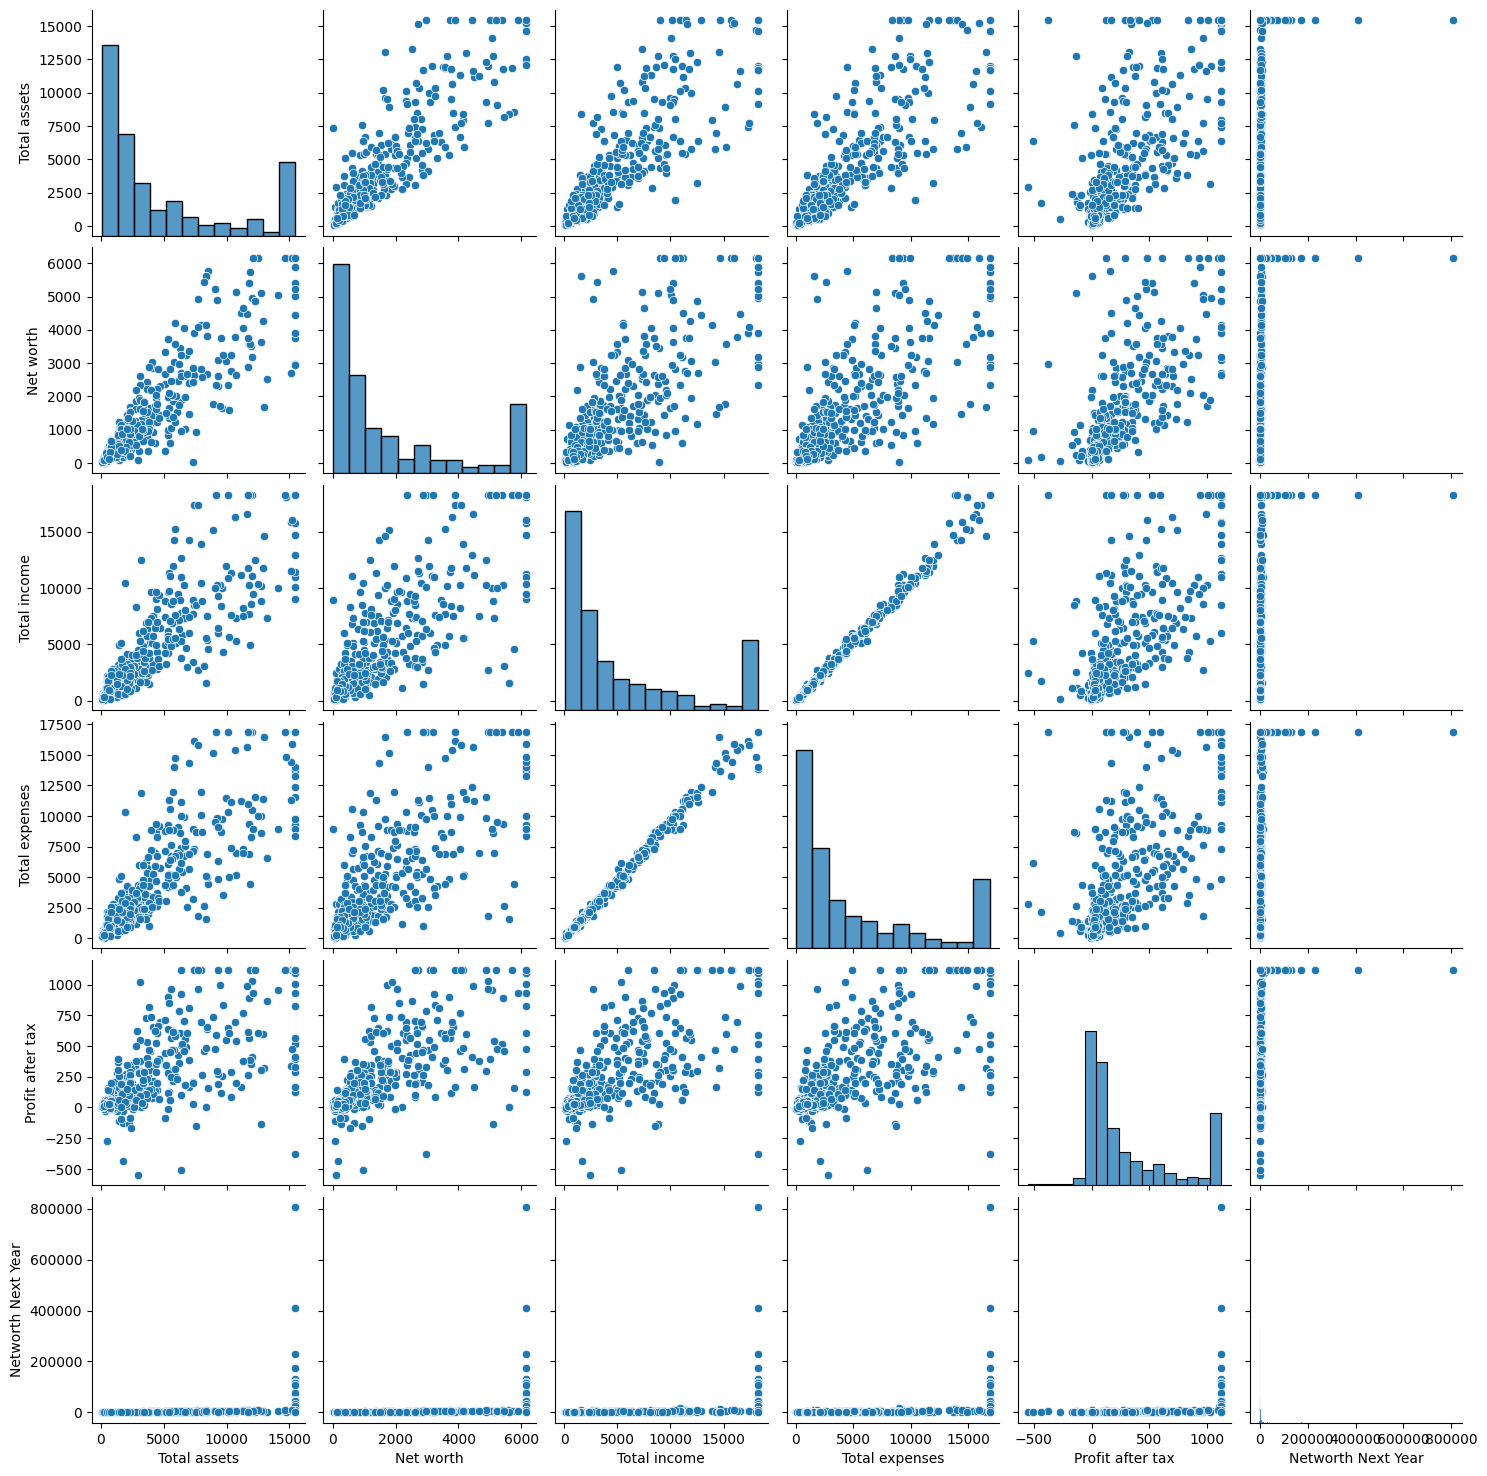

In [61]:
# key_metrics analysis
print(data[key_metrics].describe())

# Plot histograms for key financial metrics
plt.figure(figsize=(20, 10))
for i, metric in enumerate(key_metrics, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[metric], bins=30, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected key metrics
sns.pairplot(data[key_metrics + ['Networth Next Year']])
plt.show()


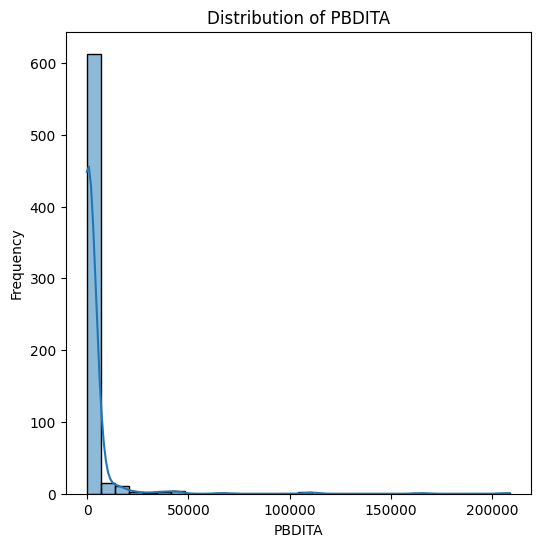

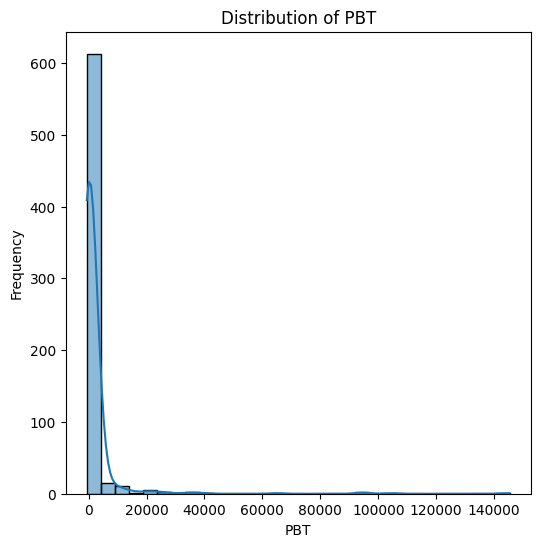

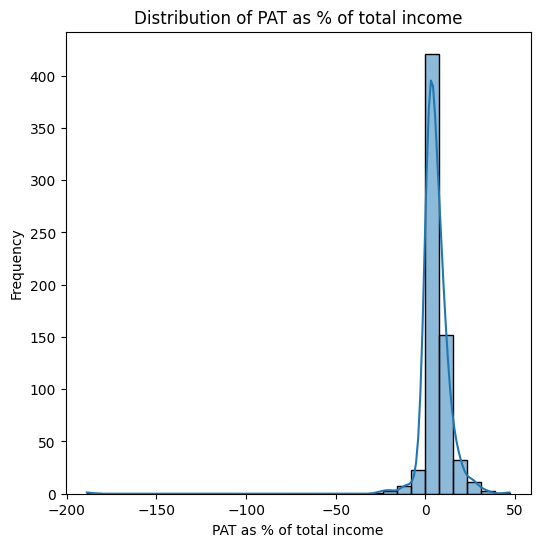

In [62]:
# List of columns to plot
columns_to_plot = ['PBDITA', 'PBT', 'PAT as % of total income']

# Plot histograms for each specified column
for column in columns_to_plot:
    plt.figure(figsize=(6, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

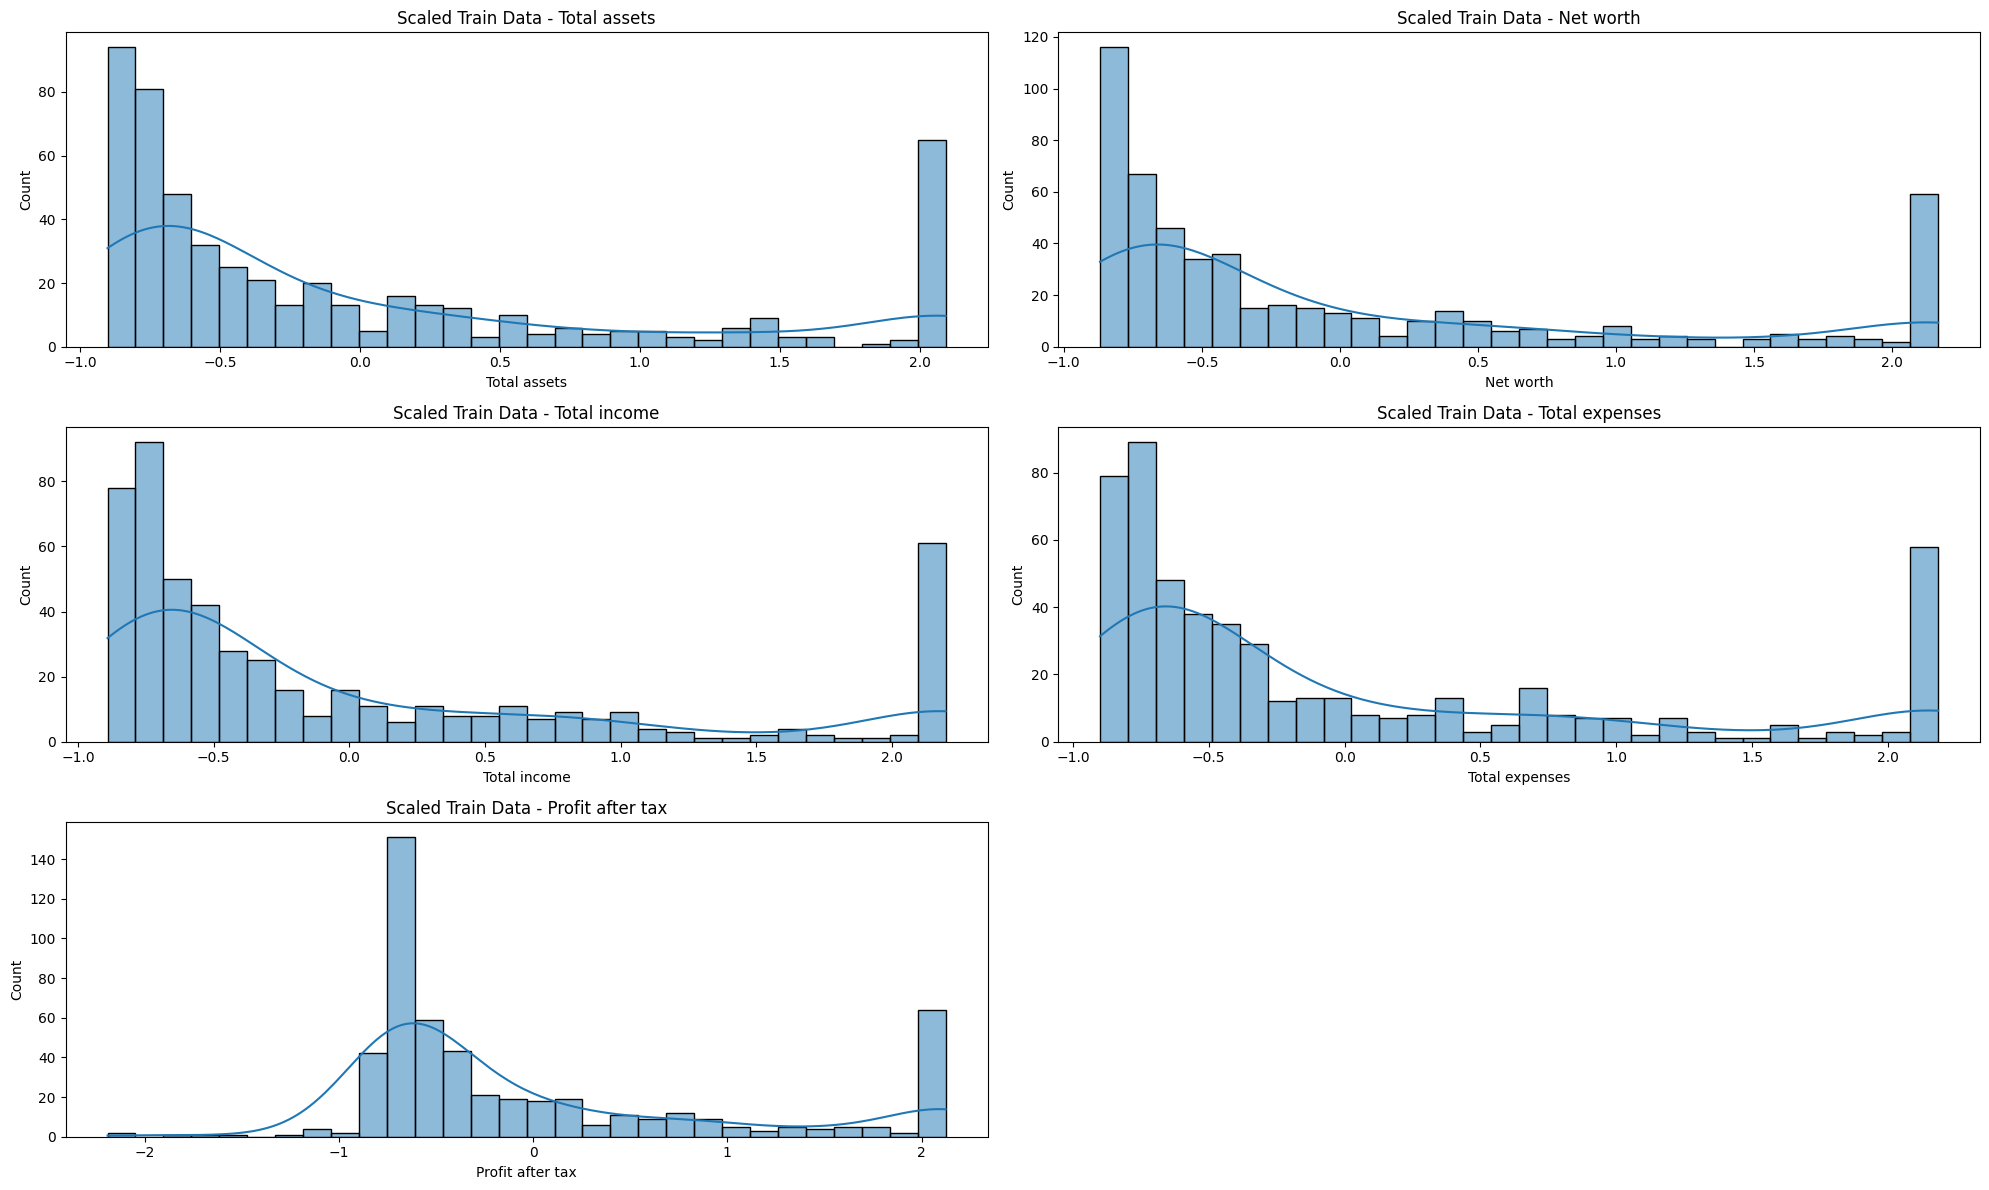

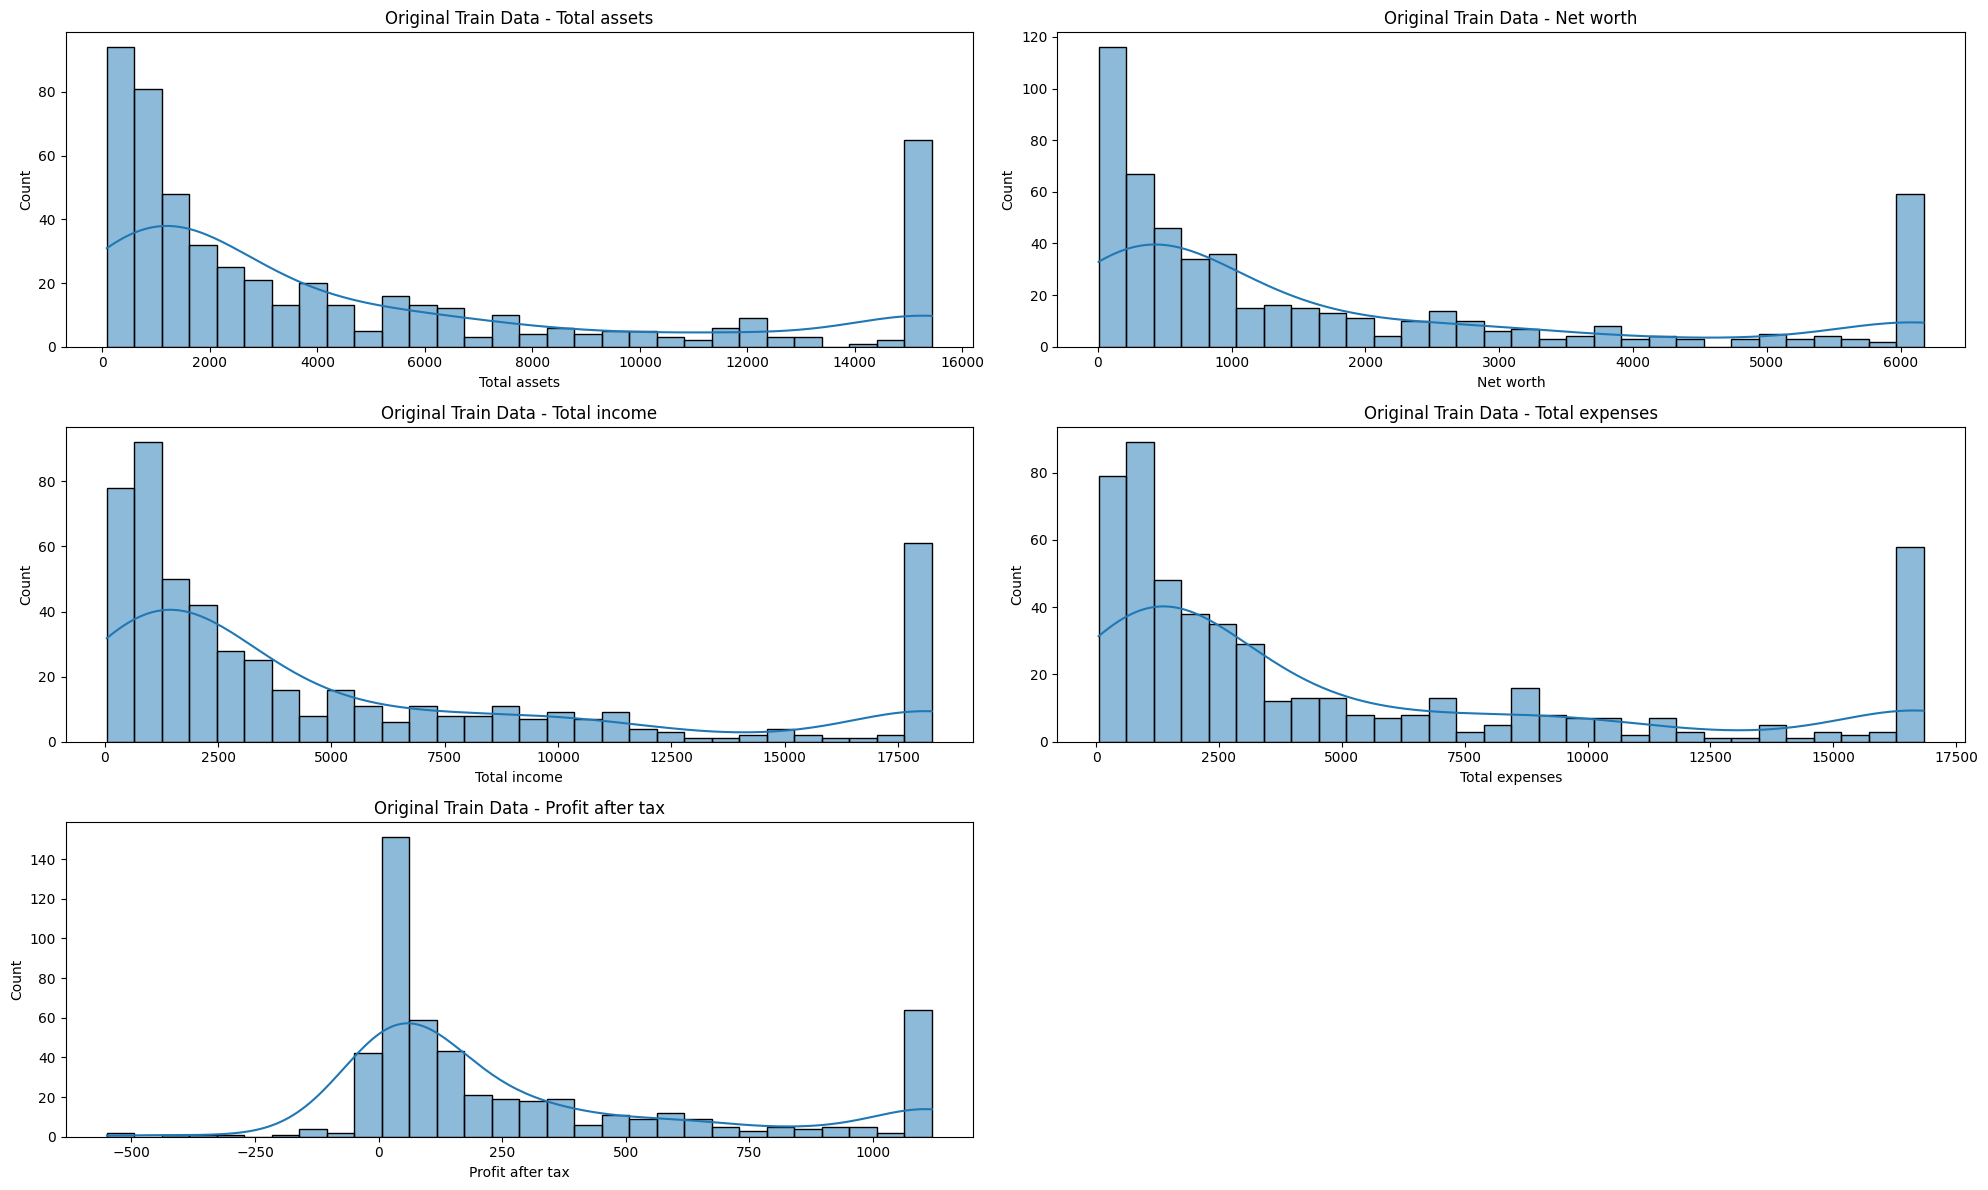

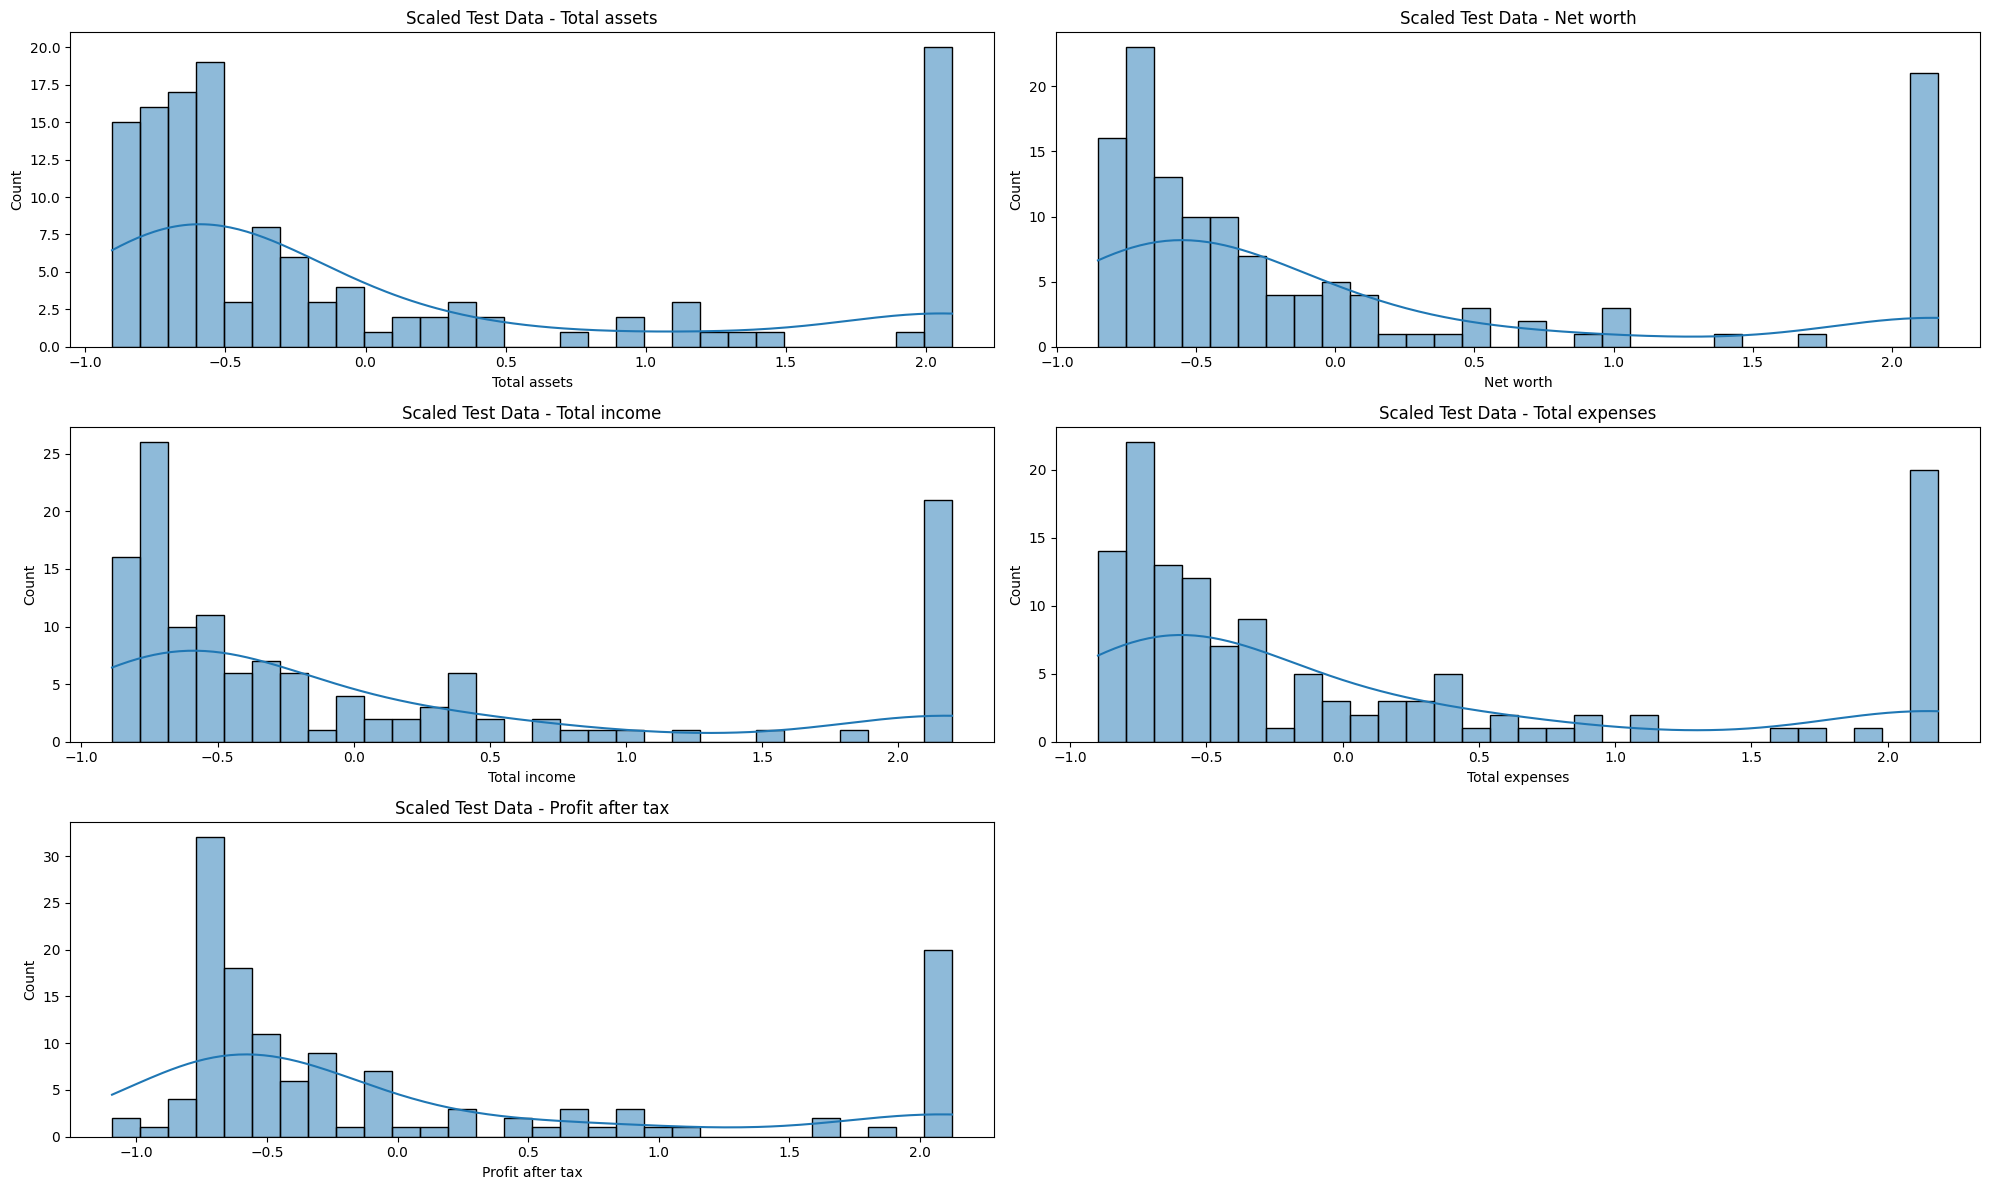

In [63]:
# Create the target variable
data['default'] = (data['Networth Next Year'] < 0).astype(int)

# Drop the original target variable from the features
data.drop(columns=['Networth Next Year'], inplace=True)

# Imputation of missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Features and target split
X = data_imputed.drop(columns=['default'])
y = data_imputed['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Function to plot histograms
def plot_histograms(data, features, title):
    plt.figure(figsize=(20, 12))
    for i, feature in enumerate(features):
        plt.subplot(3, 2, i + 1)
        sns.histplot(data[feature], bins=30, kde=True)
        plt.title(f'{title} - {feature}')
    plt.tight_layout()
    plt.show()

# Plot histograms for scaled data
plot_histograms(X_train_scaled_df, key_metrics, 'Scaled Train Data')

# Plot histograms for train data
plot_histograms(X_train_df, key_metrics, 'Original Train Data')

# Plot histograms for test data
plot_histograms(X_test_scaled_df, key_metrics, 'Scaled Test Data')



In [64]:

# Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Predictions for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")
print(f"ROC AUC Score: {roc_auc_log_reg:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Logistic Regression Model Performance:
Accuracy: 0.9924
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.9692

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       130
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       131
   macro avg       0.50      0.50      0.50       131
weighted avg       0.98      0.99      0.99       131


Random Forest Model Performance:
Accuracy: 0.9847
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.9308

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       130
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98       131
   macro avg       0.50      0.50      0.50       131
weighted avg       0.98      0.98      0.98       131



In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_vif = pd.DataFrame(X_train_scaled, columns=X.columns)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

# Display features with high VIF
print(vif_data[vif_data['VIF'] > 10])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                        Feature           VIF
1                                  Total assets  2.078553e+01
2                                     Net worth  1.585879e+01
3                                  Total income  4.980345e+02
5                                Total expenses  4.602950e+02
7                                        PBDITA  3.663332e+03
8                                           PBT  3.415372e+03
9                                   Cash profit  2.856496e+03
11                     PBT as % of total income  2.461374e+01
12                     PAT as % of total income  1.656312e+01
13             Cash profit as % of total income  1.884367e+01
15                                        Sales  1.207605e+02
16                 Income from fincial services  4.220156e+01
17                                 Other income  1.182599e+01
18                                Total capital  8.789767e+03
19                           Reserves and funds  1.201355e+06
20      

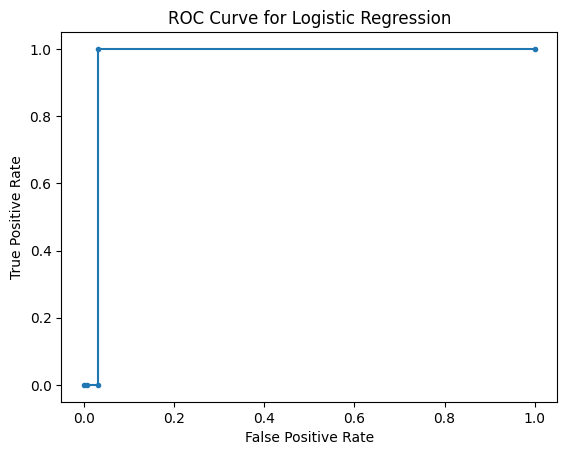

Optimal Threshold: 0.037956185695288046


In [17]:
from sklearn.metrics import roc_curve

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

# Use the optimal threshold for predictions
y_pred_log_reg_optimal = (y_pred_proba_log_reg >= optimal_threshold).astype(int)


In [18]:
# Evaluation metrics with the optimal threshold
accuracy_log_reg_optimal = accuracy_score(y_test, y_pred_log_reg_optimal)
precision_log_reg_optimal = precision_score(y_test, y_pred_log_reg_optimal)
recall_log_reg_optimal = recall_score(y_test, y_pred_log_reg_optimal)
f1_log_reg_optimal = f1_score(y_test, y_pred_log_reg_optimal)
roc_auc_log_reg_optimal = roc_auc_score(y_test, y_pred_proba_log_reg)

print("Logistic Regression Model Performance with Optimal Threshold:")
print(f"Accuracy: {accuracy_log_reg_optimal:.4f}")
print(f"Precision: {precision_log_reg_optimal:.4f}")
print(f"Recall: {recall_log_reg_optimal:.4f}")
print(f"F1 Score: {f1_log_reg_optimal:.4f}")
print(f"ROC AUC Score: {roc_auc_log_reg_optimal:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg_optimal))

Logistic Regression Model Performance with Optimal Threshold:
Accuracy: 0.9695
Precision: 0.2000
Recall: 1.0000
F1 Score: 0.3333
ROC AUC Score: 0.9692

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       130
         1.0       0.20      1.00      0.33         1

    accuracy                           0.97       131
   macro avg       0.60      0.98      0.66       131
weighted avg       0.99      0.97      0.98       131



In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='roc_auc'
)

# Fit the RandomizedSearchCV
random_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_rf = random_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 187}


In [20]:

# Train the best model
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Predictions for the best Random Forest model
y_pred_rf_best = best_rf_model.predict(X_test_scaled)
y_pred_proba_rf_best = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics for the best Random Forest model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)
roc_auc_rf_best = roc_auc_score(y_test, y_pred_proba_rf_best)

print("\nBest Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")
print(f"ROC AUC Score: {roc_auc_rf_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))



Best Random Forest Model Performance:
Accuracy: 0.9924
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.9231

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       130
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       131
   macro avg       0.50      0.50      0.50       131
weighted avg       0.98      0.99      0.99       131



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

In [21]:
# Logistic Regression Model Performance with Optimal Threshold
print("Logistic Regression Model Performance with Optimal Threshold:")
print(f"Accuracy: {accuracy_log_reg_optimal:.4f}")
print(f"Precision: {precision_log_reg_optimal:.4f}")
print(f"Recall: {recall_log_reg_optimal:.4f}")
print(f"F1 Score: {f1_log_reg_optimal:.4f}")
print(f"ROC AUC Score: {roc_auc_log_reg_optimal:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg_optimal))


Logistic Regression Model Performance with Optimal Threshold:
Accuracy: 0.9695
Precision: 0.2000
Recall: 1.0000
F1 Score: 0.3333
ROC AUC Score: 0.9692

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       130
         1.0       0.20      1.00      0.33         1

    accuracy                           0.97       131
   macro avg       0.60      0.98      0.66       131
weighted avg       0.99      0.97      0.98       131



In [22]:
# Best Random Forest Model Performance
print("\nBest Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")
print(f"ROC AUC Score: {roc_auc_rf_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))



Best Random Forest Model Performance:
Accuracy: 0.9924
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.9231

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       130
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       131
   macro avg       0.50      0.50      0.50       131
weighted avg       0.98      0.99      0.99       131



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature ranking:
1. PAT as % of total income (0.1072)
2. Cash profit as % of total income (0.0947)
3. PBT as % of total income (0.0886)
4. Debtors turnover (0.0778)
5. PAT as % of net worth (0.0738)
6. Reserves and funds (0.0525)
7. PBDITA (0.0434)
8. PBT (0.0424)
9. Cash profit (0.0394)
10. Cumulative retained profits (0.0392)
11. Shareholders funds (0.0265)
12. EPS (0.0226)
13. Creditors turnover (0.0184)
14. Profit after tax (0.0165)
15. Adjusted EPS (0.0161)
16. PE on BSE (0.0144)
17. WIP turnover (0.0131)
18. Net fixed assets (0.0130)
19. Net worth (0.0125)
20. Other income (0.0120)
21. Sales (0.0114)
22. Deferred tax liability (0.0093)
23. Total expenses (0.0092)
24. Cash to current liabilities (times) (0.0090)
25. TOL/TNW (0.0089)
26. Investments (0.0084)
27. Total capital (0.0083)
28. Current assets (0.0082)
29. Shares outstanding (0.0080)
30. Total liabilities (0.0078)
31. Capital employed (0.0074)
32. Net working capital (0.0070)
33. Num (0.0069)
34. Total term liabilities / 

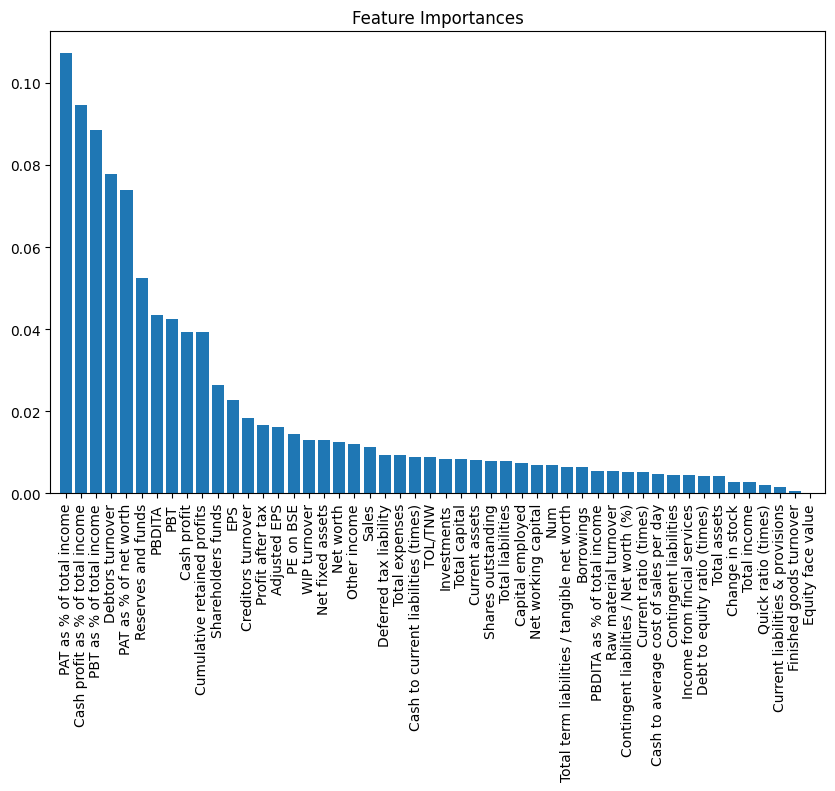

In [23]:
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
